In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def loadImg(path):
  img = cv2.imread(path, 0)
  return img
def showImg(img):
  plt.axis("off")
  plt.imshow(img, cmap="gray")
  plt.show()

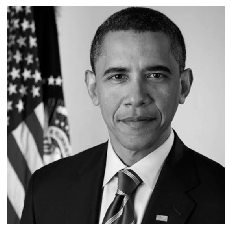

In [0]:
img = loadImg("image.jpg")
showImg(img)

In [0]:
Gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
Gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
print(Gx)
print(Gy)

[[   0. -122. -150. ...    4.    4.    0.]
 [   0. -129. -158. ...    4.    4.    0.]
 [   0. -142. -173. ...    4.    4.    0.]
 ...
 [   0.    0.    0. ...   -2.   -2.    0.]
 [   0.    0.    0. ...   -6.   -6.    0.]
 [   0.    0.    0. ...   -8.   -8.    0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [ -2.  -9. -24. ...   0.   0.   0.]
 [-32. -38. -51. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...  -2.  -6.  -8.]
 [  0.   0.   0. ...  -2.  -6.  -8.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [0]:
mag,ang = cv2.cartToPolar(Gx, Gy)

print(mag)
print(ang*180/np.pi)

[[  0.        122.        150.        ...   4.          4.
    0.       ]
 [  2.        129.31357   159.8124    ...   4.          4.
    0.       ]
 [ 32.        146.9966    180.36075   ...   4.          4.
    0.       ]
 ...
 [  0.          0.          0.        ...   2.828427    6.3245554
    8.       ]
 [  0.          0.          0.        ...   6.3245554   8.485281
    8.       ]
 [  0.          0.          0.        ...   8.          8.
    0.       ]]
[[  0.      180.      180.      ...   0.        0.        0.     ]
 [270.      183.9902  188.6366  ...   0.        0.        0.     ]
 [270.      194.98364 196.42818 ...   0.        0.        0.     ]
 ...
 [  0.        0.        0.      ... 224.99043 251.56133 270.     ]
 [  0.        0.        0.      ... 198.43866 224.99043 270.     ]
 [  0.        0.        0.      ... 180.      180.        0.     ]]


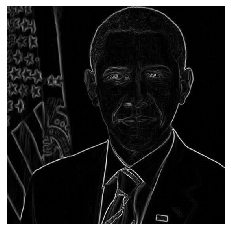

In [0]:
showImg(mag)

In [0]:
def hog(img, B):
  gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
  gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
  mag,ang = cv2.cartToPolar(gx, gy)
  bins = np.int32((ang*B)/(2*np.pi))
  bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
  mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
  hists = [np.bincount(b.ravel(), m.ravel(), B) for b,m in zip(bin_cells, mag_cells)]
  hist = np.hstack(hists)
  return hist

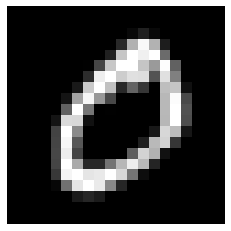

In [0]:
img = loadImg("digits.png")
img1 = img[0:20, 0:20]
showImg(img1)

(32,)


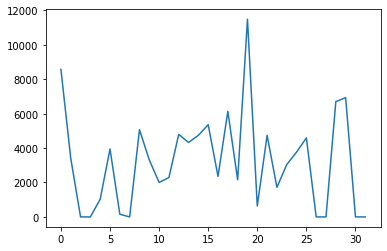

In [0]:
hist = hog(img1, 8)
print(hist.shape)
plt.plot(hist)
plt.show()

In [0]:
img = loadImg("digits.png")

train = []
target = []

for x in range(50):
  for y in range(50):
    train.append( hog(img[20*x:20*(x+1), 20*y:20*(y+1)], 16) )
    target.append(x//5)

train = np.vstack(train)
target = np.vstack(target)

test = []

for x in range(50):
  for y in range(50, 100):
    test.append( hog(img[20*x:20*(x+1), 20*y:20*(y+1)], 16) )
test = np.vstack(test)

train = np.float32(train)
test = np.float32(test)

print(train.shape)
print(test.shape)
print(target.shape)

(2500, 64)
(2500, 64)
(2500, 1)


In [0]:
svm = cv2.ml.SVM_create()
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setType(cv2.ml.SVM_C_SVC)
svm.setC(2.67)
svm.setGamma(5.383)

svm.train(train, cv2.ml.ROW_SAMPLE, target)

True

In [0]:
result = svm.predict(test)[1]
mask = (result==target)
correct = np.count_nonzero(mask)
print(correct*100.0/result.size)

90.32


La clase del numero es 9


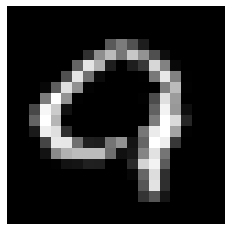

In [0]:
import random

x = random.choice(range(0, 50))
y = random.choice(range(50, 100))

img2 = img[20*x:20*(x+1),20*y:20*(y+1)]

hist = hog(img2, 16)
hist = np.float32(hist)
result = int( svm.predict(hist.reshape(1,64))[1][0][0] )
print('La clase del numero es {}'.format(result))

showImg(img2)